<a href="https://colab.research.google.com/github/arpitarumma/feedforward/blob/main/NNDL21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse


In [ ]:
# Handle argument parsing
import argparse
import sys  # Import the sys module

# Create an argument parser
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=False, default="output_plot.png", help="path to the output loss/accuracy plot")
# Check if the script is being run from a notebook or terminal
args = vars(ap.parse_args(args=[] if sys.argv[1:] else ["--output", "output_plot.png"]))

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train / 255.0  # Normalize pixel values to between 0 and 1
x_test = x_test / 255.0

# Flatten the images to a 1D array of 28*28=784 pixels
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convert labels to one-hot encoded vectors using LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)  # One-hot encode the training labels
y_test = lb.transform(y_test)  # One-hot encode the test labels
print(y_train)  # Print the array to the console
# Or, to view a portion of the array:
print(y_train[:5])  # Print the first 5 rows of the array

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [ ]:
model = Sequential()

# Input layer (input shape is 784, since MNIST images are 28x28 pixels)
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Hidden layer
model.add(Dense(64, activation='relu'))

# Output layer (10 units for 10 classes, softmax for classification)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',  # Changed loss function
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6961 - loss: 1.0858
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9125 - loss: 0.3094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9308 - loss: 0.2455
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9421 - loss: 0.2072
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9473 - loss: 0.1833


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9440 - loss: 0.1931
Test accuracy: 0.9521999955177307


In [ ]:
predictions = model.predict(x_test)

# Print the predicted class for the first test image
print(f'Predicted label for the first image: {predictions[0].argmax()}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for the first image: 7


In [ ]:
# Evaluate the model and make predictions
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=128)

# Generate the classification report
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.93      0.94       892
           6       0.94      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



[INFO] accessing MNIST...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1484 - loss: 2.3098 - val_accuracy: 0.3998 - val_loss: 2.2326
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3840 - loss: 2.2163 - val_accuracy: 0.5141 - val_loss: 2.1511
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5473 - loss: 2.1302 - val_accuracy: 0.5570 - val_loss: 2.0366
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5926 - loss: 2.0051 - val_accuracy: 0.6568 - val_loss: 1.8702
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6544 - loss: 1.8292 - val_accuracy: 0.6750 - val_loss: 1.6544
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6862 - loss: 1.6077 - val_accuracy: 0.7032 - val_loss: 1.4266
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7299 - loss: 1.3891 - val_accuracy: 0.7601 - val_loss: 1.2277
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7

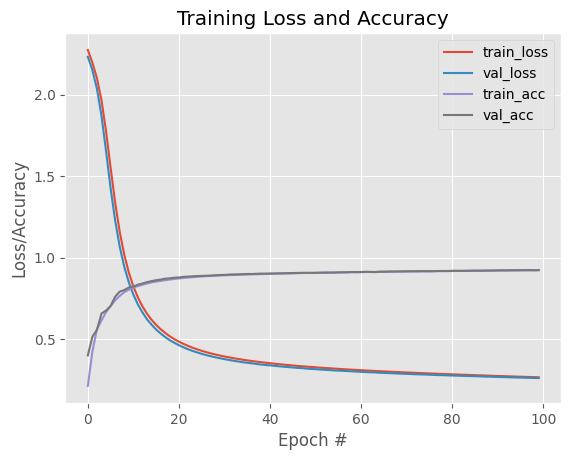

In [ ]:
# Load the MNIST dataset
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Reshape and scale the data
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1)).astype("float32") / 255.0
testX = testX.reshape((testX.shape[0], 28 * 28 * 1)).astype("float32") / 255.0

# Convert labels to one-hot encoded vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Define the neural network architecture
model = Sequential([
    Dense(256, input_shape=(784,), activation="sigmoid"),
    Dense(128, activation="sigmoid"),
    Dense(10, activation="softmax")
])

# Compile the model
print("[INFO] training network...")
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Train the model
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

# Evaluate the model
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

# Plot the training loss and accuracy
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])